In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [33]:
bit=pd.read_csv("./Bitcoin_Historical.csv")
eth=pd.read_csv("./Etherium_Historical.csv")

bit.head(5)



,Average electricity cost assumption: 0.05 USD/kWh,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Timestamp,Date and Time,"power MAX, GW","power MIN, GW","power GUESS, GW","annualised consumption MAX, TWh","annualised consumption MIN, TWh","annualised consumption GUESS, TWh"
1,1279411200,2010-07-18T00:00:00,2.66617854612e-05,2.244033609651e-05,2.44400135294118e-05,0.000233717211352879,0.000196711986222007,0.000214241158598823
2,1279497600,2010-07-19T00:00:00,2.681671695e-05,2.257073676625e-05,2.45820343137255e-05,0.0002350753407837,0.000197855078492948,0.000215486112794118
3,1279584000,2010-07-20T00:00:00,2.7230096606e-05,2.29186646433833e-05,2.49609663398693e-05,0.000238699026848196,0.000200905014263898,0.000218807830935294
4,1279670400,2010-07-21T00:00:00,2.84443564044e-05,2.394066664037e-05,2.60740398039216e-05,0.00024934322824097,0.000209863883769483,0.000228565032921176


In [34]:
eth.head(5)

,Date and Time,"power MIN, kW","power GUESS, kW","power MAX, kW","annualised consumption MIN, GWh","annualised consumption GUESS, GWh","annualised consumption MAX, GWh"
0,2021-12-12T00:00:00,66.0005,202.4875,484.8596,0.5786,1.7750,4.2503
1,2021-12-13T00:00:00,65.4855,200.9034,481.0347,0.5740,1.7611,4.2168
2,2021-12-14T00:00:00,65.8819,202.1162,483.9265,0.5775,1.7718,4.2421
3,2021-12-15T00:00:00,66.6386,204.4301,489.4689,0.5842,1.7920,4.2907
4,2021-12-16T00:00:00,67.3218,206.5210,494.4748,0.5901,1.8104,4.3346


In [35]:
column_names=bit.iloc[0]
bit.rename(columns=column_names, inplace=True)
bit.drop(bit.index[0],inplace=True)
bit.head(5)

,Timestamp,Date and Time,"power MAX, GW","power MIN, GW","power GUESS, GW","annualised consumption MAX, TWh","annualised consumption MIN, TWh","annualised consumption GUESS, TWh"
1,1279411200,2010-07-18T00:00:00,2.66617854612e-05,2.244033609651e-05,2.44400135294118e-05,0.000233717211352879,0.000196711986222007,0.000214241158598823
2,1279497600,2010-07-19T00:00:00,2.681671695e-05,2.257073676625e-05,2.45820343137255e-05,0.0002350753407837,0.000197855078492948,0.000215486112794118
3,1279584000,2010-07-20T00:00:00,2.7230096606e-05,2.29186646433833e-05,2.49609663398693e-05,0.000238699026848196,0.000200905014263898,0.000218807830935294
4,1279670400,2010-07-21T00:00:00,2.84443564044e-05,2.394066664037e-05,2.60740398039216e-05,0.00024934322824097,0.000209863883769483,0.000228565032921176
5,1279756800,2010-07-22T00:00:00,2.821182175968e-05,2.3744949981064e-05,2.58608826666667e-05,0.000247304829545355,0.000208148231534007,0.000226696497456


In [36]:
bit['power MAX, GW'] = bit['power MAX, GW'].astype(float)
bit['power MIN, GW'] = bit['power MIN, GW'].astype(float)
bit['power GUESS, GW'] = bit['power GUESS, GW'].astype(float)
bit['annualised consumption MAX, TWh'] = bit['annualised consumption MAX, TWh'].astype(float)
bit['annualised consumption MIN, TWh'] = bit['annualised consumption MIN, TWh'].astype(float)
bit['annualised consumption GUESS, TWh'] = bit['annualised consumption GUESS, TWh'].astype(float)

In [37]:
bit.reset_index(drop=True, inplace=True)


In [38]:

eth[['power MIN, kW', 'power GUESS, kW', 'power MAX, kW']] *= 0.001


eth.rename(columns={'power MIN, kW': 'power MIN, MW', 
                    'power GUESS, kW': 'power GUESS, MW', 
                    'power MAX, kW': 'power MAX, MW'}, inplace=True)


bit[['annualised consumption MIN, TWh', 'annualised consumption GUESS, TWh', 'annualised consumption MAX, TWh']] *= 1000


bit.rename(columns={'annualised consumption MIN, TWh': 'annualised consumption MIN, GWh', 
                    'annualised consumption GUESS, TWh': 'annualised consumption GUESS, GWh', 
                    'annualised consumption MAX, TWh': 'annualised consumption MAX, GWh'}, inplace=True)


In [39]:
eth.head(5)

,Date and Time,"power MIN, MW","power GUESS, MW","power MAX, MW","annualised consumption MIN, GWh","annualised consumption GUESS, GWh","annualised consumption MAX, GWh"
0,2021-12-12T00:00:00,0.066001,0.202488,0.484860,0.5786,1.7750,4.2503
1,2021-12-13T00:00:00,0.065486,0.200903,0.481035,0.5740,1.7611,4.2168
2,2021-12-14T00:00:00,0.065882,0.202116,0.483926,0.5775,1.7718,4.2421
3,2021-12-15T00:00:00,0.066639,0.204430,0.489469,0.5842,1.7920,4.2907
4,2021-12-16T00:00:00,0.067322,0.206521,0.494475,0.5901,1.8104,4.3346


In [40]:
bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Timestamp                          4979 non-null   object 
 1   Date and Time                      4979 non-null   object 
 2   power MAX, GW                      4979 non-null   float64
 3   power MIN, GW                      4979 non-null   float64
 4   power GUESS, GW                    4979 non-null   float64
 5   annualised consumption MAX, GWh    4979 non-null   float64
 6   annualised consumption MIN, GWh    4979 non-null   float64
 7   annualised consumption GUESS, GWh  4979 non-null   float64
dtypes: float64(6), object(2)
memory usage: 311.3+ KB


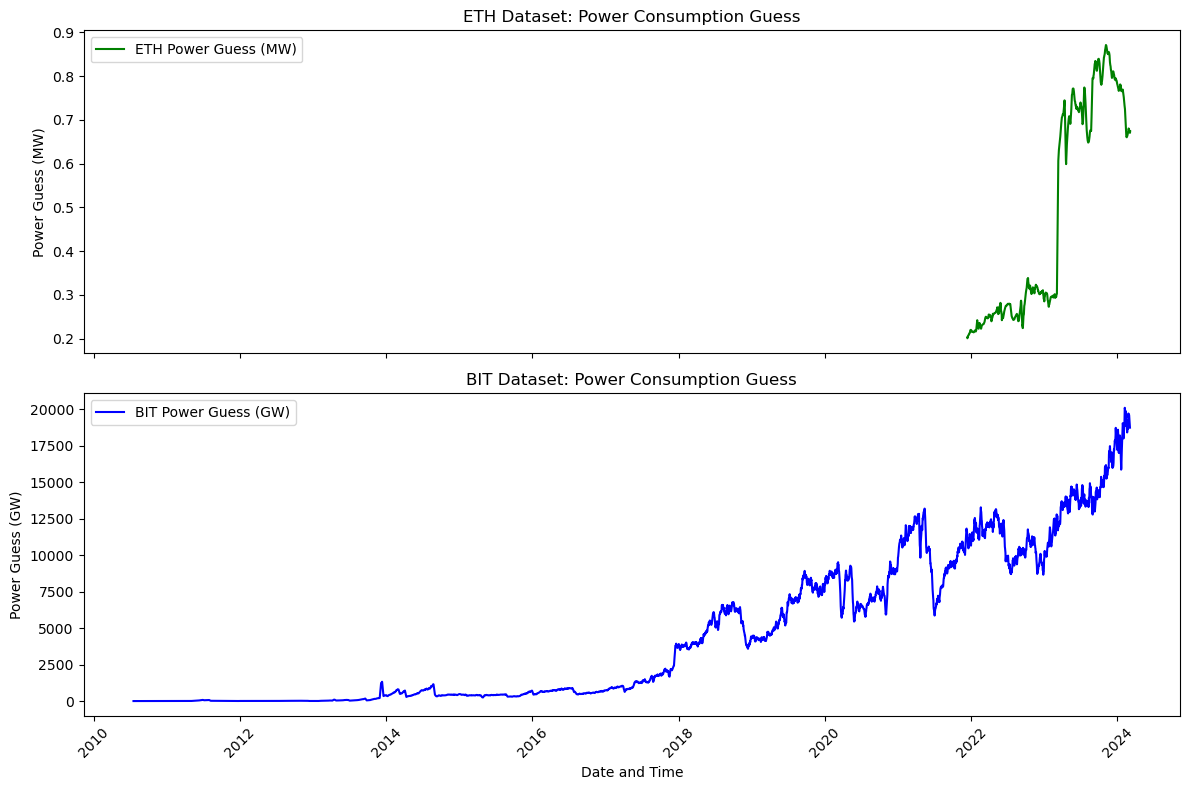

In [41]:
eth['Date and Time'] = pd.to_datetime(eth['Date and Time'])
bit['Date and Time'] = pd.to_datetime(bit['Date and Time'])


fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)


axs[0].plot(eth['Date and Time'], eth['power GUESS, MW'], 'g-', label='ETH Power Guess (MW)')
axs[0].set_ylabel('Power Guess (MW)')
axs[0].legend()
axs[0].set_title('ETH Dataset: Power Consumption Guess')


axs[1].plot(bit['Date and Time'], bit['power GUESS, GW']*1000, 'b-', label='BIT Power Guess (GW)')  # Assuming conversion from GW to MW if necessary
axs[1].set_xlabel('Date and Time')
axs[1].set_ylabel('Power Guess (GW)')
axs[1].legend()
axs[1].set_title('BIT Dataset: Power Consumption Guess')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

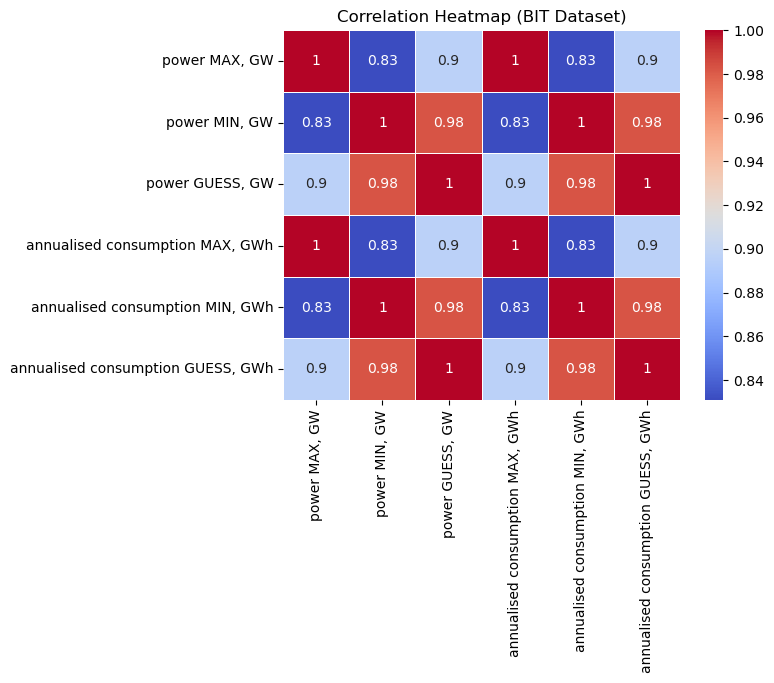

In [42]:
sns.heatmap(bit.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (BIT Dataset)')
plt.show()


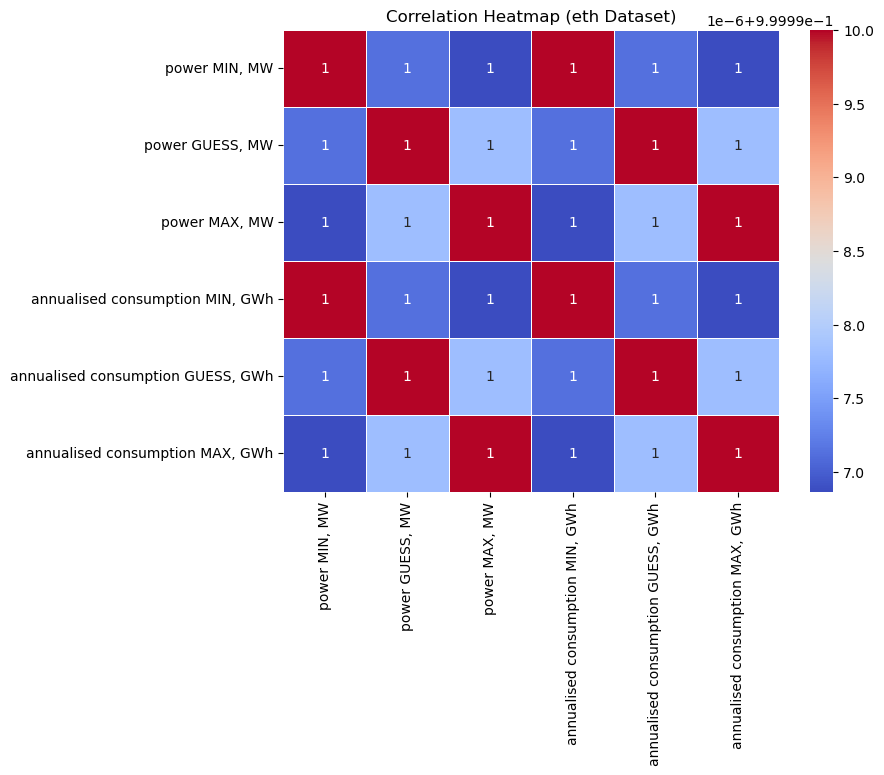

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(eth.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (eth Dataset)')
plt.show()

In [47]:
bit_price=pd.read_csv("Bitcoin_Price.csv")
eth_price=pd.read_csv("Ethereum_Price.csv")

In [48]:
bit_price.head(5)



,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 09, 2024","47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
1,"Feb 08, 2024","45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
2,"Feb 07, 2024","44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
3,"Feb 06, 2024","43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
4,"Feb 05, 2024","42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%


In [49]:
bit_price['Price'] = bit_price['Price'].str.replace(',', '').astype(float)
bit_price['Open'] = bit_price['Open'].str.replace(',', '').astype(float)
bit_price['High'] = bit_price['High'].str.replace(',', '').astype(float)
bit_price['Low'] = bit_price['Low'].str.replace(',', '').astype(float)
bit_price['Change %'] = bit_price['Change %'].str.replace('%', '').astype(float)

def convert_volume(vol):
    if vol == '-':
        return np.nan
    elif 'K' in vol:
        return float(vol.replace('K', '')) * 1e3
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1e6
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1e9
    else:
        return float(vol)

# Convert 'Vol.' to numeric, handling 'K'
bit_price['Vol.'] = bit_price['Vol.'].apply(convert_volume)

In [56]:
eth_price['Vol'] = eth_price['Vol'].apply(convert_volume)

In [51]:
bit_price

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 09, 2024",47545.4,45293.3,47710.2,45254.2,86850.0,4.97
1,"Feb 08, 2024",45293.3,44346.2,45579.2,44336.4,66380.0,2.15
2,"Feb 07, 2024",44339.8,43088.4,44367.9,42783.5,48570.0,2.91
3,"Feb 06, 2024",43087.7,42697.6,43375.5,42566.8,33320.0,0.91
4,"Feb 05, 2024",42697.2,42581.4,43532.2,42272.5,39260.0,0.27
...,...,...,...,...,...,...,...
4950,"Jul 22, 2010",0.1,0.1,0.1,0.1,2160.0,0.00
4951,"Jul 21, 2010",0.1,0.1,0.1,0.1,580.0,0.00
4952,"Jul 20, 2010",0.1,0.1,0.1,0.1,260.0,0.00
4953,"Jul 19, 2010",0.1,0.1,0.1,0.1,570.0,0.00


In [57]:
bit_price['Date'] = pd.to_datetime(bit_price['Date'])
eth_price['Date'] = pd.to_datetime(eth_price['Date'])

In [58]:
bit_price.set_index('Date', inplace=True)
eth_price.set_index('Date', inplace=True)


In [64]:
years = ['2022', '2023']

volume_totals = {
    'Year': years,
    'Bitcoin Volume': [],
    'Ethereum Volume': []
}

# Calculate volumes for each year
for year in years:
    bit_volume_total = bit_price.loc[year, 'Vol.'].sum()
    eth_volume_total = eth_price.loc[year, 'Vol'].sum()
    volume_totals['Bitcoin Volume'].append(bit_volume_total)
    volume_totals['Ethereum Volume'].append(eth_volume_total)

# Create a summary DataFrame
summary_df = pd.DataFrame(volume_totals)

In [65]:
summary_df

,Year,Bitcoin Volume,Ethereum Volume
0,2022,6.055342e+10,1.867190e+10
1,2023,4.223870e+07,6.924638e+07


In [66]:
bit.head(5)

,Timestamp,Date and Time,"power MAX, GW","power MIN, GW","power GUESS, GW","annualised consumption MAX, GWh","annualised consumption MIN, GWh","annualised consumption GUESS, GWh"
0,1279411200,2010-07-18,0.000027,0.000022,0.000024,0.233717,0.196712,0.214241
1,1279497600,2010-07-19,0.000027,0.000023,0.000025,0.235075,0.197855,0.215486
2,1279584000,2010-07-20,0.000027,0.000023,0.000025,0.238699,0.200905,0.218808
3,1279670400,2010-07-21,0.000028,0.000024,0.000026,0.249343,0.209864,0.228565
4,1279756800,2010-07-22,0.000028,0.000024,0.000026,0.247305,0.208148,0.226696


In [74]:
eth.head(5)

,Date and Time,"power MIN, MW","power GUESS, MW","power MAX, MW","annualised consumption MIN, GWh","annualised consumption GUESS, GWh","annualised consumption MAX, GWh"
0,2021-12-12,0.066001,0.202488,0.484860,0.5786,1.7750,4.2503
1,2021-12-13,0.065486,0.200903,0.481035,0.5740,1.7611,4.2168
2,2021-12-14,0.065882,0.202116,0.483926,0.5775,1.7718,4.2421
3,2021-12-15,0.066639,0.204430,0.489469,0.5842,1.7920,4.2907
4,2021-12-16,0.067322,0.206521,0.494475,0.5901,1.8104,4.3346


In [72]:
year_of_interest = 2022

bit_year_data = bit[bit['Date and Time'].dt.year == year_of_interest]
eth_year_data = eth[eth['Date and Time'].dt.year == year_of_interest]


annual_consumption_guess_btc = bit_year_data['annualised consumption GUESS, GWh'].sum()
annual_consumption_guess_eth = eth_year_data['annualised consumption GUESS, GWh'].sum()

print(annual_consumption_guess_btc.round(2))
print(annual_consumption_guess_eth.round(2))

34892184.67
851.3


In [73]:
year_of_interest = 2023

bit_year_data = bit[bit['Date and Time'].dt.year == year_of_interest]
eth_year_data = eth[eth['Date and Time'].dt.year == year_of_interest]

annual_consumption_guess_btc_1 = bit_year_data['annualised consumption GUESS, GWh'].sum()
annual_consumption_guess_eth_1 = eth_year_data['annualised consumption GUESS, GWh'].sum()

print(annual_consumption_guess_btc_1.round(2))
print(annual_consumption_guess_eth_1.round(2))

44244209.08
2136.8


In [67]:
eth.head(5)

,Date and Time,"power MIN, MW","power GUESS, MW","power MAX, MW","annualised consumption MIN, GWh","annualised consumption GUESS, GWh","annualised consumption MAX, GWh"
0,2021-12-12,0.066001,0.202488,0.484860,0.5786,1.7750,4.2503
1,2021-12-13,0.065486,0.200903,0.481035,0.5740,1.7611,4.2168
2,2021-12-14,0.065882,0.202116,0.483926,0.5775,1.7718,4.2421
3,2021-12-15,0.066639,0.204430,0.489469,0.5842,1.7920,4.2907
4,2021-12-16,0.067322,0.206521,0.494475,0.5901,1.8104,4.3346


In [76]:
summary_df['Bitcoin Guess Consumption (GWh)'] = [annual_consumption_guess_btc.round(2), annual_consumption_guess_btc_1.round(2)]
summary_df['Ethereum Guess Consumption (GWh)'] = [annual_consumption_guess_eth.round(2), annual_consumption_guess_eth_1.round(2)]
summary_df['Bitcoin Emissions per Transaction (GWh)'] = summary_df['Bitcoin Guess Consumption (GWh)'] / summary_df['Bitcoin Volume']
summary_df['Ethereum Emissions per Transaction (GWh)'] = summary_df['Ethereum Guess Consumption (GWh)'] / summary_df['Ethereum Volume']

summary_df


,Year,Bitcoin Volume,Ethereum Volume,Bitcoin Guess Consumption (GWh),Ethereum Guess Consumption (GWh),Bitcoin Emissions per Transaction (GWh),Ethereum Emissions per Transaction (GWh)
0,2022,6.055342e+10,1.867190e+10,34892184.67,851.3,0.000576,4.559256e-08
1,2023,4.223870e+07,6.924638e+07,44244209.08,2136.8,1.047480,3.085793e-05
